# Hello PyTorch 201 with Model Class for Linear Regression

In [1]:
# Prerequisites
import numpy as np
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn 

### Get Dataset

In [2]:
data_file = 'data/cars.csv'
df_cars = pd.read_csv(data_file)
df_cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Visualize Data

<Axes: xlabel='wt', ylabel='mpg'>

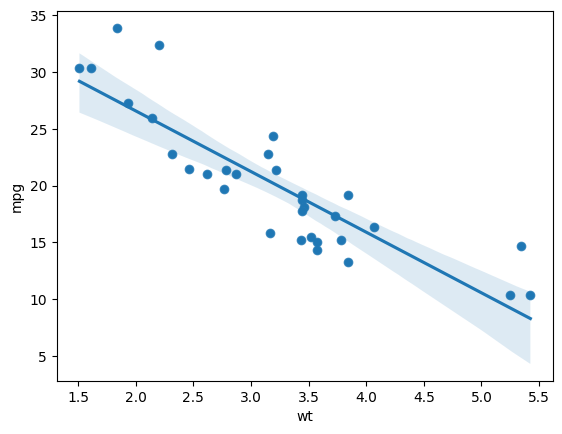

In [3]:
sns.scatterplot(x='wt', y='mpg', data=df_cars)
sns.regplot(x='wt', y='mpg', data=df_cars)

### Convert Data to Tensors

In [4]:
X_list = df_cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = df_cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

### Create Model Class

In [5]:
# Simple Linear Regression Model Class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

### Instatiate Model

In [6]:
# Instantiate Model
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


### Define Hyperparameters

In [7]:
# Use Mean Squared Error Loss Function
loss_func = nn.MSELoss()

# Learning Rate
LR = 0.02

# Optimizer Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

# Number of Epochs
NR_EPOCHS = 1000

# Batch Size
BATCH_SIZE = 2

### Define Training Loop

In [8]:
# Lists to store loss and parameters
losses, slope, bias = [], [], []

for epoch in range(NR_EPOCHS):

    for i in range(0, X.shape[0], BATCH_SIZE):
        
        # Set gradients to zero
        optimizer.zero_grad()

        # Forward pass: Compute predicted y by passing batch_size number of samples to the model
        y_pred = model(X[i:i+BATCH_SIZE])

        # Compute loss
        loss = loss_func(y_pred, y_true[i:i+BATCH_SIZE])
        loss.backward()  # Calculate gradients

        # update weights
        optimizer.step()

    # Get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                #slope.append(param.data.numpy()[0][0])
                slope.append(param.item())
            if name == 'linear.bias':
                #bias.append(param.data.numpy()[0])
                bias.append(param.item())

    # Store loss
    losses.append(loss.item())

    # Print every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}: loss = {loss.item():.4f}')


Epoch 1: loss = 35.0198
Epoch 101: loss = 1.5666
Epoch 201: loss = 1.4115
Epoch 301: loss = 1.4094
Epoch 401: loss = 1.4094
Epoch 501: loss = 1.4094
Epoch 601: loss = 1.4094
Epoch 701: loss = 1.4094
Epoch 801: loss = 1.4094
Epoch 901: loss = 1.4094


### Visualize Parameters

<Axes: >

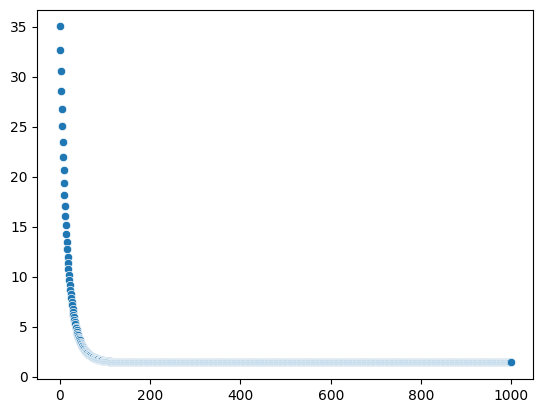

In [9]:
# Visualize losses
sns.scatterplot(x=range(NR_EPOCHS), y=losses)

<Axes: >

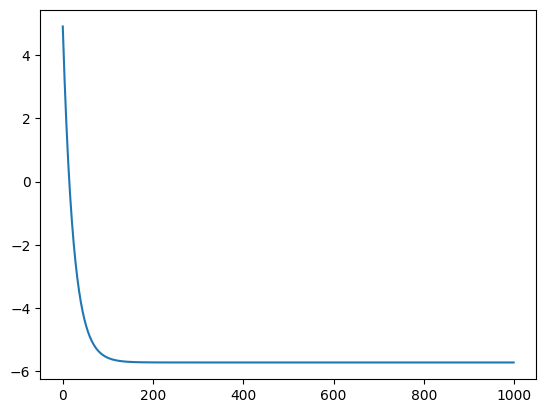

In [10]:
# Visualize slope
sns.lineplot(x=range(NR_EPOCHS), y=slope)

<Axes: >

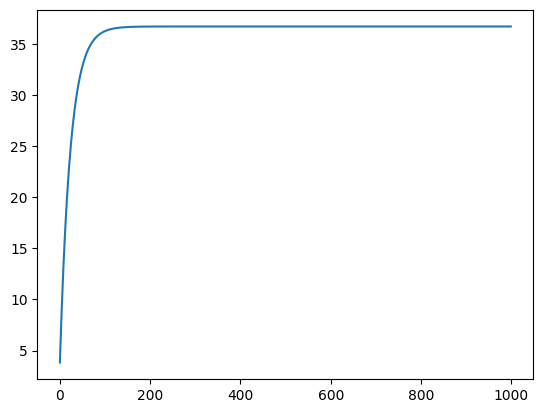

In [11]:
# Visualize bias
sns.lineplot(x=range(NR_EPOCHS), y=bias)

### Visualize Regression Line

<Axes: >

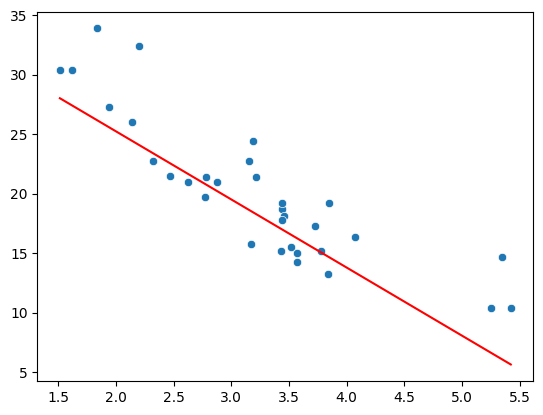

In [12]:
# Visualize Regression Line
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')